# Exploratory Data Analysis 

In this project, we will analyse the data of a Superstore and identify ways to increase profit.

**Importing all libraries**

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

## **Loading of Datasets**

In [61]:
data=pd.read_csv("/content/SampleSuperstore.csv")
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [62]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

This project analyses the dataset containing sales information of a retail store and find the areas of improvements and also provides relevant solutions.

DATASET: The dataset consists of 13 columns and nearly 10000 rows. Columns present were Category, Sub-category, Profit, Sales, Quantity etc. 

Implementation: Various charts are plotted for comprehensible understanding of the trends in the dataset and to analyse various business related problems which is resulting into high Loss for some items. These analysed problems are shown visually to determine the areas which needs improvement. Lastly, a dashnoard is made consisting of important graphs which can be used to make final decision and provide effective solutions to minimise the loss in future.

Packages used:

1. Pandas
2. Matplotlib
3. Seaborn

## **Data Preprocessing and Cleaning**

In [63]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Drop Unwanted columns**

In [64]:
data=data.drop(columns=["Ship Mode","Segment","Country","Postal Code"])
data.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [65]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


**Finding sales for each category and subcategory**

In [67]:
sales_df=data.groupby("Category",as_index=False)["Sales"].sum()
sales_df

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [68]:
subcat_df=data.groupby(["Category","Sub-Category"])["Sales"].sum()
subcat_df["Sales"]=map(int,subcat_df)
subcat_df

Category         Sub-Category
Furniture        Bookcases                          114879.9963
                 Chairs                              328449.103
                 Furnishings                          91705.164
                 Tables                              206965.532
Office Supplies  Appliances                          107532.161
                 Art                                  27118.792
                 Binders                             203412.733
                 Envelopes                            16476.402
                 Fasteners                              3024.28
                 Labels                               12486.312
                 Paper                                78479.206
                 Storage                             223843.608
                 Supplies                             46673.538
Technology       Accessories                         167380.318
                 Copiers                              149528.03
          

**Visualizing the Sales for each Category**

Text(0.5, 0, 'Category')

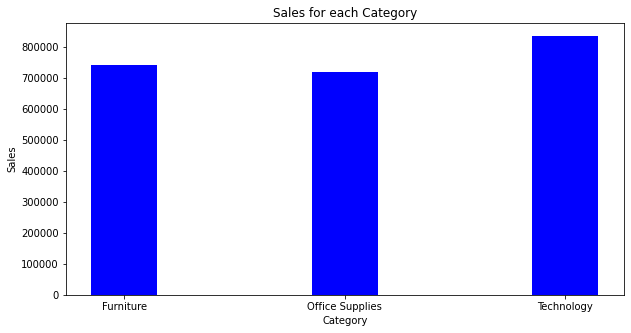

In [69]:
plt.figure(figsize=(10,5))
plt.bar(sales_df['Category'],sales_df['Sales'],color='Blue',width=0.3) 
plt.title(label="Sales for each Category", loc='center')
plt.ylabel('Sales')
plt.xlabel('Category')

**Calculating Profits/loss for each State**

In [70]:
profit_df=data.groupby("State",as_index=False)["Profit"].sum()
profit_df.sample(5)

,State,Profit
43,Vermont,2244.9783
0,Alabama,5786.8253
26,Nevada,3316.7659
35,Oregon,-1190.4705
7,District of Columbia,1059.5893


**Visualizing the Profit/loss for each state**

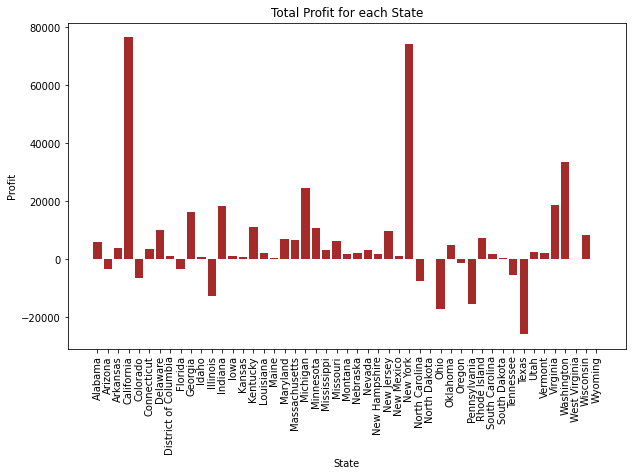

In [71]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(profit_df['State'],profit_df['Profit'],color='Brown') 
ax.set_title(label="Total Profit for each State", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('State')
ax.set_xticklabels(profit_df['State'],rotation=90)
plt.show()

**Boxplot showing the Profits grouped by Discounts**

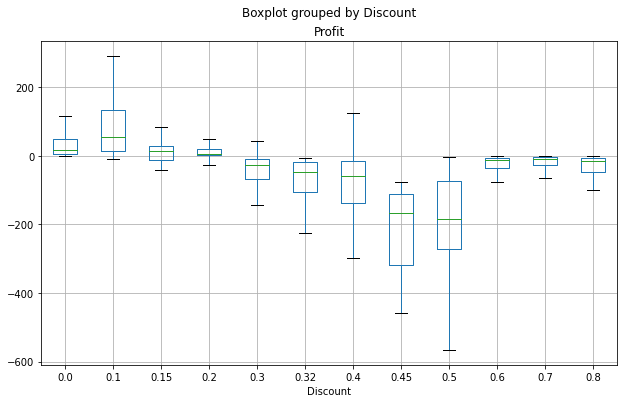

In [72]:
data.boxplot(column="Profit",by="Discount",figsize=(10,6),showfliers=False)

# Loss Analysis based on several factors

**1. Based on State**

In [73]:
state_in_loss=profit_df[profit_df.Profit<0]
state_in_loss

,State,Profit
1,Arizona,-3427.9246
4,Colorado,-6527.8579
8,Florida,-3399.3017
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
33,Ohio,-16971.3766
35,Oregon,-1190.4705
36,Pennsylvania,-15559.9603
40,Tennessee,-5341.6936
41,Texas,-25729.3563


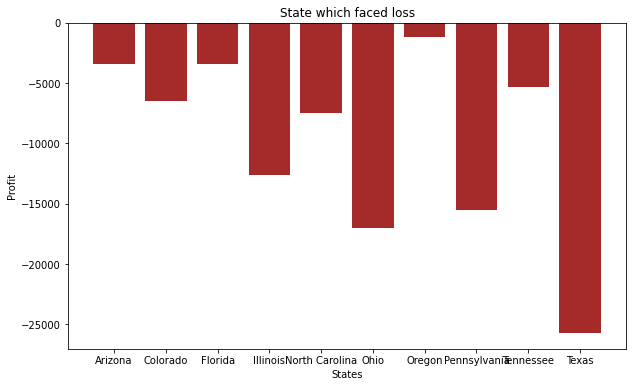

In [74]:
plt.figure(figsize=(10,6))
plt.bar(state_in_loss["State"],state_in_loss["Profit"],color="Brown")
plt.title("State which faced loss")
plt.xlabel("States")
plt.ylabel("Profit")
plt.show()

Here we have visualised loss faced by various states. We can thus get the states which needs better deals to earn profit like:
1. TEXAS
2. OHIO
3. PENNSYLVANIA
4. ILLINOIS

**2. Based on Region**

In [89]:
df_loss=data.loc[data.Profit < 0].reset_index(drop=True)
df_profit=data.loc[data.Profit>=0].reset_index(drop=True)
new_df=df_loss.groupby(["Region","State"],as_index=False)["Profit"].count()
new_df=new_df[new_df.Profit > 40]
new_df

,Region,State,Profit
0,Central,Illinois,255
1,Central,Texas,486
8,East,New York,47
9,East,Ohio,209
10,East,Pennsylvania,278
13,South,Florida,126
14,South,North Carolina,68
15,South,Tennessee,65
16,West,Arizona,85
17,West,California,105


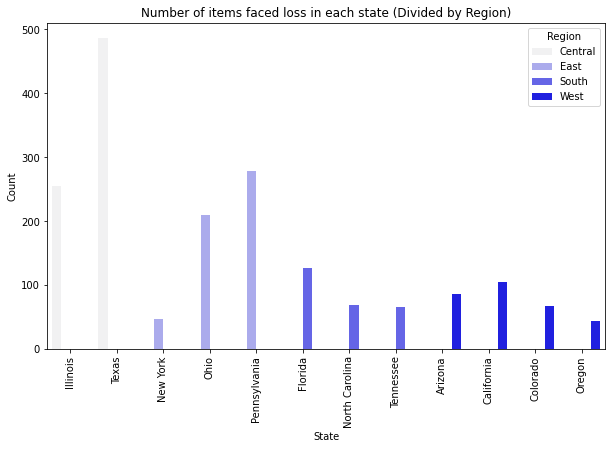

In [88]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=new_df,x=new_df.State,y=new_df.Profit,hue=new_df.Region,color="Blue")
ax.set_xlabel("State")
ax.set_xticklabels(new_df["State"],rotation=90)
ax.set_ylabel("Count")
ax.set_title("Number of items faced loss in each state (Divided by Region)")
plt.show()

It can be seen that regions like Central and East have maximum loss count with specific states in that region.

**3. Based on Category**

Now we will check for the category of items which faced loss.

In [99]:
df_profit['Discount'].value_counts().reindex(data.Discount.unique(), fill_value=0).sort_values()
df_loss['Discount'].value_counts().reindex(data.Discount.unique(), fill_value=0)
new_df2=df_loss.groupby("Category",as_index=False)["Profit"].count()
new_df2.head()

,Category,Profit
0,Furniture,714
1,Office Supplies,886
2,Technology,271


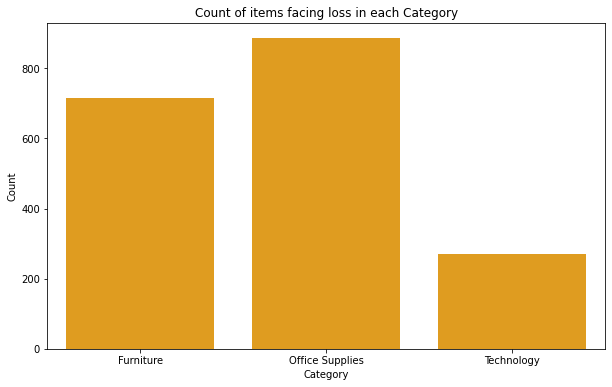

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(new_df2["Category"],new_df2["Profit"],color="Orange")
plt.title("Count of items facing loss in each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

It can be seen that maximum items which faced loss belongs to Office Supplies Category followed by Furniture and technology Category respectively.

**Effect of Profit and Discount on Each Category**

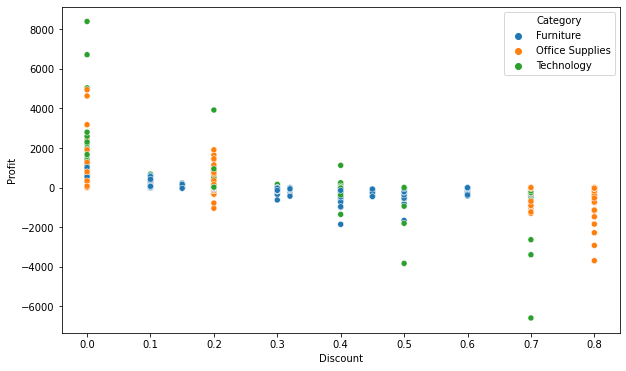

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Discount,y=data.Profit,hue=data.Category,color="Blue")

So we can say that Office Supplies is facing the maximum loss despite of giving the most discount(0.8) where other Categories are Profitable with low discounts.

**4. Based on Discount**

    Discount  Profit
0       0.10       4
1       0.15      17
2       0.20     502
3       0.30     208
4       0.32      27
5       0.40     180
6       0.45      11
7       0.50      66
8       0.60     138
9       0.70     418
10      0.80     300


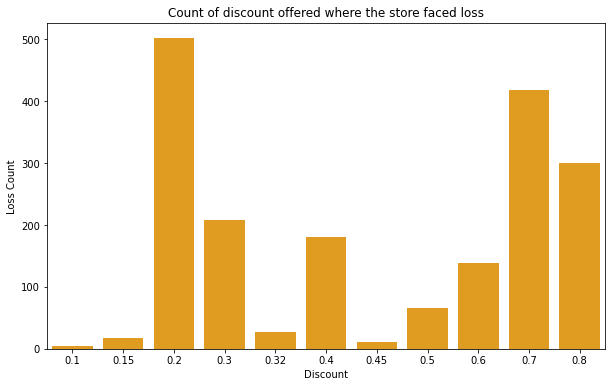

In [126]:
new_df3=df_loss.groupby("Discount",as_index=False)["Profit"].count()
print(new_df3)
plt.figure(figsize=(10,6))
sns.barplot(x=new_df3["Discount"],y=new_df3["Profit"],color="Orange")
plt.title("Count of discount offered where the store faced loss")
plt.xlabel("Discount")
plt.ylabel("Loss Count")
plt.show()


   Discount  Profit
0      0.00    4798
1      0.10      90
2      0.15      35
3      0.20    3155
4      0.30      19
5      0.40      26


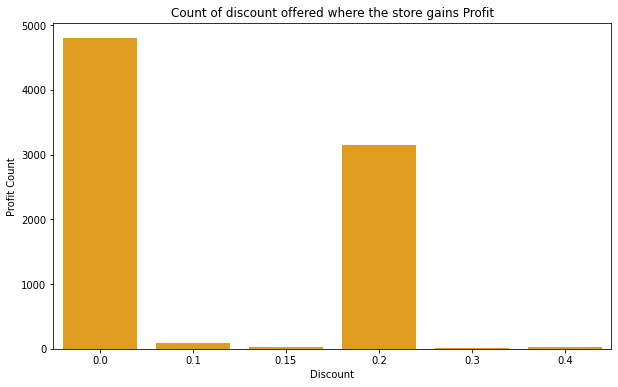

In [127]:
new_df4=df_profit.groupby("Discount",as_index=False)["Profit"].count()
print(new_df4)
plt.figure(figsize=(10,6))
sns.barplot(x=new_df4["Discount"],y=new_df4["Profit"],color="Orange")
plt.title("Count of discount offered where the store gains Profit")
plt.xlabel("Discount")
plt.ylabel("Profit Count")
plt.show()


After Visualizing these two plots of loss count and profit count vs Discount, we concludes that higher the discount higher is the loss count and lower the discount higher the Profit count.

# Conclusion


1.   we can conclude that we neeed to work on states like Texas, Ohio, Pennsylvania, Illinois and also on Office Supplies Category.
2.   Giving discount of 0.2 yields maximum times Loss(500). But the profit count of it is exeptionally high (nearly 3000) too. Also for discounts < 0.2 loss count is low.Hence we conclude that giving high discounts can lead to loss.




**Solutions**


1.   Giving low discount ( < 15%) on Office Sales products.
2.   Advertising and improvising sales in some Central and Eastern states like Texas and Ohio using low discount, great deals etc.

